# Statistical Analysis

Load the data

In [1]:
from cesnet_datazoo.datasets import CESNET_QUIC22, CESNET_TLS22
from cesnet_datazoo.config import DatasetConfig

dataset = CESNET_QUIC22(data_root="data/CESNET_QUIC22/", size="XS", silent=True)

dataset_config = DatasetConfig(
    dataset=dataset,
    train_period_name="W-2022-44",
    train_size=100_000,
    use_packet_histograms=True,
    return_other_fields=True,
)
dataset.set_dataset_config_and_initialize(dataset_config)

data_df = dataset.get_train_df()

data_df.columns

Index(['ID', 'SRC_IP', 'DST_IP', 'DST_ASN', 'SRC_PORT', 'DST_PORT', 'PROTOCOL',
       'QUIC_VERSION', 'QUIC_SNI', 'QUIC_USERAGENT', 'TIME_FIRST', 'TIME_LAST',
       'PPI', 'BYTES', 'BYTES_REV', 'PACKETS', 'PACKETS_REV', 'DURATION',
       'PPI_LEN', 'PPI_ROUNDTRIPS', 'PPI_DURATION', 'FLOW_ENDREASON_IDLE',
       'FLOW_ENDREASON_ACTIVE', 'FLOW_ENDREASON_OTHER', 'PSIZE_BIN1',
       'PSIZE_BIN2', 'PSIZE_BIN3', 'PSIZE_BIN4', 'PSIZE_BIN5', 'PSIZE_BIN6',
       'PSIZE_BIN7', 'PSIZE_BIN8', 'PSIZE_BIN1_REV', 'PSIZE_BIN2_REV',
       'PSIZE_BIN3_REV', 'PSIZE_BIN4_REV', 'PSIZE_BIN5_REV', 'PSIZE_BIN6_REV',
       'PSIZE_BIN7_REV', 'PSIZE_BIN8_REV', 'IPT_BIN1', 'IPT_BIN2', 'IPT_BIN3',
       'IPT_BIN4', 'IPT_BIN5', 'IPT_BIN6', 'IPT_BIN7', 'IPT_BIN8',
       'IPT_BIN1_REV', 'IPT_BIN2_REV', 'IPT_BIN3_REV', 'IPT_BIN4_REV',
       'IPT_BIN5_REV', 'IPT_BIN6_REV', 'IPT_BIN7_REV', 'IPT_BIN8_REV', 'APP'],
      dtype='object')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

head

In [3]:
data_df.head()

,ID,SRC_IP,DST_IP,DST_ASN,SRC_PORT,DST_PORT,PROTOCOL,QUIC_VERSION,QUIC_SNI,QUIC_USERAGENT,...,IPT_BIN8,IPT_BIN1_REV,IPT_BIN2_REV,IPT_BIN3_REV,IPT_BIN4_REV,IPT_BIN5_REV,IPT_BIN6_REV,IPT_BIN7_REV,IPT_BIN8_REV,APP
0,264,221.113.244.124,157.240.30.18,32934,58972,443,17,1,rupload.facebook.com,,...,0.0,9.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,31
1,324,221.180.99.216,157.240.30.35,32934,63093,443,17,1,www.facebook.com,,...,0.0,10.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,32
2,329,114.175.67.39,104.18.33.63,13335,16376,443,17,1,ets.easybrain.com,,...,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22
3,830,156.145.38.36,142.251.36.97,15169,65421,443,17,1,yt3.ggpht.com,,...,4.0,111.0,4.0,1.0,0.0,0.0,0.0,1.0,4.0,100
4,1322,156.228.186.25,35.186.224.25,15169,55276,443,17,1,spclient.wg.spotify.com,,...,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,91


describe

In [4]:
data_df.describe(percentiles=[0.05, 0.25, 0.5, 0.95, 0.99])

,ID,DST_ASN,SRC_PORT,DST_PORT,PROTOCOL,QUIC_VERSION,TIME_FIRST,TIME_LAST,BYTES,BYTES_REV,...,IPT_BIN8,IPT_BIN1_REV,IPT_BIN2_REV,IPT_BIN3_REV,IPT_BIN4_REV,IPT_BIN5_REV,IPT_BIN6_REV,IPT_BIN7_REV,IPT_BIN8_REV,APP
count,1.000000e+05,100000.000000,100000.000000,100000.0,100000.0,1.000000e+05,100000,100000,1.000000e+05,1.000000e+05,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,1.629439e+07,18619.095800,51496.707800,443.0,17.0,4.950919e+08,2022-11-03 09:06:49.327056128,2022-11-03 09:06:58.795219968,1.639926e+04,1.692565e+05,...,0.830870,141.594635,2.737030,2.216220,1.055980,0.649340,0.31633,0.235840,0.843510,52.756530
min,2.640000e+02,1241.000000,1025.000000,443.0,17.0,1.000000e+00,2022-10-30 23:56:45.469183,2022-10-30 23:59:03.798318,1.228000e+03,5.900000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5%,1.599980e+06,13335.000000,19227.850000,443.0,17.0,1.000000e+00,2022-10-31 12:42:55.439288064,2022-10-31 12:42:59.574591232,1.614000e+03,2.345000e+03,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,15.000000
25%,8.057210e+06,15169.000000,49357.000000,443.0,17.0,1.000000e+00,2022-11-02 08:16:54.412834304,2022-11-02 08:17:01.209112832,2.730000e+03,3.244000e+03,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,32.000000
50%,1.630756e+07,15169.000000,54725.000000,443.0,17.0,1.000000e+00,2022-11-03 09:47:27.409313536,2022-11-03 09:47:37.650504192,4.178500e+03,5.257000e+03,...,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,55.000000
95%,3.104615e+07,32934.000000,64341.050000,443.0,17.0,4.207849e+09,2022-11-06 15:59:01.975923968,2022-11-06 15:59:02.473191936,3.524730e+04,2.497760e+05,...,4.000000,222.000000,9.000000,8.000000,4.000000,3.000000,2.00000,1.000000,4.000000,99.000000
99%,3.235117e+07,36183.000000,65300.010000,443.0,17.0,4.278190e+09,2022-11-06 22:31:19.414954496,2022-11-06 22:31:19.518503168,1.332815e+05,3.132121e+06,...,10.000000,2545.030000,33.000000,22.000000,14.000000,9.000000,5.00000,4.000000,9.000000,100.000000
max,3.267240e+07,55836.000000,65535.000000,443.0,17.0,4.278190e+09,2022-11-06 23:58:37.453247,2022-11-06 23:58:37.536841,2.060549e+08,6.242670e+08,...,148.000000,487923.000000,1451.000000,1492.000000,391.000000,366.000000,139.00000,51.000000,147.000000,100.000000
std,9.457805e+06,7928.886903,13021.903372,0.0,0.0,1.359765e+09,NaN,NaN,6.881355e+05,2.636015e+06,...,2.568979,2076.983398,12.833291,8.626863,4.263467,3.261657,1.50824,0.990399,2.566259,23.659168


download or upload

In [5]:
download_upload_df = data_df.copy(False)

# create a new column to indicate the direction of the flow, default is None
download_upload_df[["DIRECTION"]] = "BOTH"

coefficient = 0.9

# set the direction of the flow based on the nubmer of bytes
download_upload_df.loc[download_upload_df["BYTES"] * coefficient > download_upload_df["BYTES_REV"], "DIRECTION"] = "UPLOAD"
download_upload_df.loc[download_upload_df["BYTES"] < download_upload_df["BYTES_REV"] * coefficient, "DIRECTION"] = "DOWNLOAD"

download_upload_df["DIRECTION"].value_counts()

DIRECTION
DOWNLOAD    64765
UPLOAD      25133
BOTH        10102
Name: count, dtype: int64

most popular apps

In [6]:
app_counts_df = data_df.copy(False)

app_counts_df[["APP_NAME"]] = None

# get the app number from 'app' column and translate it using the 'app_labels' dictionary
app_counts_df["APP_NAME"] = app_counts_df["APP"].apply(lambda x: dataset._tables_app_enum.get(x, "Unknown"))

app_counts_df["APP_NAME"].value_counts()

APP_NAME
bongacams                6830
cloudflare-cdnjs         6355
alza-identity            6323
flightradar24            6110
playradio                5551
                         ... 
google-authentication       9
instagram                   9
ebay-kleinanzeigen          9
google-autofill             8
uber                        7
Name: count, Length: 101, dtype: int64

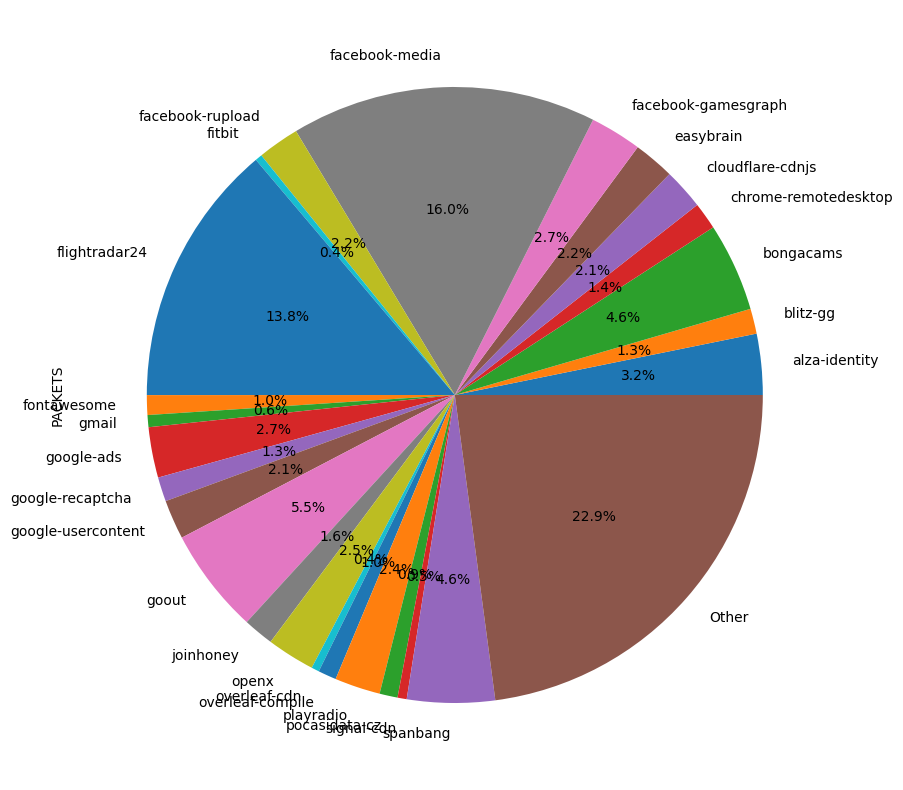

In [7]:
# pie chart of the most popular apps, apps with less than 1000 packets are grouped into 'Other' category
app_counts_df_pie = app_counts_df.copy(True)

app_counts_df_pie = app_counts_df_pie[app_counts_df_pie["APP_NAME"].isin(app_counts_df["APP_NAME"].value_counts().index[app_counts_df["APP_NAME"].value_counts() > 1000])]
app_counts_df_pie = app_counts_df_pie[["APP_NAME", "PACKETS"]].groupby(by="APP_NAME").sum()

app_counts_df_pie.loc["Other"] = app_counts_df[~app_counts_df["APP_NAME"].isin(app_counts_df_pie.index)]["PACKETS"].sum()

fig = plt.figure()
ax = fig.add_subplot()
app_counts_df_pie.plot.pie(y="PACKETS", legend=None, ax=ax, figsize=(10, 10), autopct='%1.1f%%')

del app_counts_df_pie

In [8]:
columns = ["PSIZE_BIN1", "PSIZE_BIN2", "PSIZE_BIN3", "PSIZE_BIN4", "PSIZE_BIN5", "PSIZE_BIN6", "PSIZE_BIN7", "PSIZE_BIN8",
           "IPT_BIN1", "IPT_BIN2", "IPT_BIN3", "IPT_BIN4", "IPT_BIN5", "IPT_BIN6", "IPT_BIN7", "IPT_BIN8"]

app_counts_df[columns][app_counts_df["APP_NAME"] == "chrome-remotedesktop"].describe(percentiles=[0.05, 0.5, 0.95])

,PSIZE_BIN1,PSIZE_BIN2,PSIZE_BIN3,PSIZE_BIN4,PSIZE_BIN5,PSIZE_BIN6,PSIZE_BIN7,PSIZE_BIN8,IPT_BIN1,IPT_BIN2,IPT_BIN3,IPT_BIN4,IPT_BIN5,IPT_BIN6,IPT_BIN7,IPT_BIN8
count,1405.0,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.00000,1405.000000,1405.000000,1405.000000,1405.000000
mean,0.0,0.076868,38.140213,3.274021,0.900356,1.179359,0.060498,1.519573,40.610676,1.639858,0.649822,0.36726,0.298221,0.191459,0.131673,0.261922
std,0.0,0.538872,78.210846,22.383530,4.378793,3.895794,0.297015,0.834918,87.164818,3.085875,1.645531,1.37605,0.987113,0.569586,0.447087,0.726784
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5%,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,39.000000,2.000000,0.000000,1.000000,0.000000,1.000000,41.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
95%,0.0,0.000000,76.800000,6.000000,2.000000,2.000000,0.800000,3.000000,82.800000,5.000000,3.000000,2.00000,1.000000,1.000000,1.000000,1.000000
max,0.0,10.000000,2421.000000,822.000000,99.000000,111.000000,4.000000,13.000000,2427.000000,81.000000,32.000000,35.00000,24.000000,7.000000,5.000000,10.000000


In [9]:
# describe flightradar24
app_counts_df[columns][app_counts_df["APP_NAME"] == "google-recaptcha"].describe(percentiles=[0.05, 0.5, 0.95]).round(2)

,PSIZE_BIN1,PSIZE_BIN2,PSIZE_BIN3,PSIZE_BIN4,PSIZE_BIN5,PSIZE_BIN6,PSIZE_BIN7,PSIZE_BIN8,IPT_BIN1,IPT_BIN2,IPT_BIN3,IPT_BIN4,IPT_BIN5,IPT_BIN6,IPT_BIN7,IPT_BIN8
count,2784.0,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00,2784.00
mean,0.0,0.11,12.09,1.91,4.72,0.02,0.00,1.64,14.47,2.66,0.80,0.34,0.26,0.20,0.15,0.61
std,0.0,1.61,24.99,0.61,12.72,0.16,0.05,9.56,29.88,9.85,2.38,1.36,1.16,0.98,0.66,1.21
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,0.0,0.00,4.00,0.00,1.00,0.00,0.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.0,0.00,6.00,2.00,2.00,0.00,0.00,1.00,8.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,0.0,0.00,32.85,3.00,14.00,0.00,0.00,2.00,35.85,7.00,3.00,2.00,1.00,1.00,1.00,3.00
max,0.0,42.00,455.00,6.00,237.00,3.00,2.00,493.00,505.00,478.00,79.00,27.00,24.00,26.00,12.00,8.00


In [10]:
# describe facebook-media
app_counts_df[columns][app_counts_df["APP_NAME"] == "facebook-media"].describe(percentiles=[0.05, 0.5, 0.95]).round(2)

,PSIZE_BIN1,PSIZE_BIN2,PSIZE_BIN3,PSIZE_BIN4,PSIZE_BIN5,PSIZE_BIN6,PSIZE_BIN7,PSIZE_BIN8,IPT_BIN1,IPT_BIN2,IPT_BIN3,IPT_BIN4,IPT_BIN5,IPT_BIN6,IPT_BIN7,IPT_BIN8
count,4135.0,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00,4135.00
mean,0.0,0.66,143.81,13.34,4.44,6.98,1.42,2.51,157.30,6.67,2.94,1.69,1.09,0.63,0.53,1.30
std,0.0,3.52,471.76,203.01,19.90,24.30,4.59,2.81,609.16,21.59,13.35,8.60,4.71,2.38,1.94,3.39
min,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,0.0,0.00,1.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.0,0.00,12.00,2.00,0.00,1.00,1.00,2.00,14.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
95%,0.0,3.00,706.30,19.00,19.30,35.00,6.00,6.00,736.30,27.00,11.00,6.00,5.00,3.00,3.00,6.00
max,0.0,99.00,12824.00,12087.00,462.00,896.00,112.00,96.00,25519.00,461.00,333.00,281.00,108.00,61.00,46.00,88.00


<Axes: ylabel='count'>

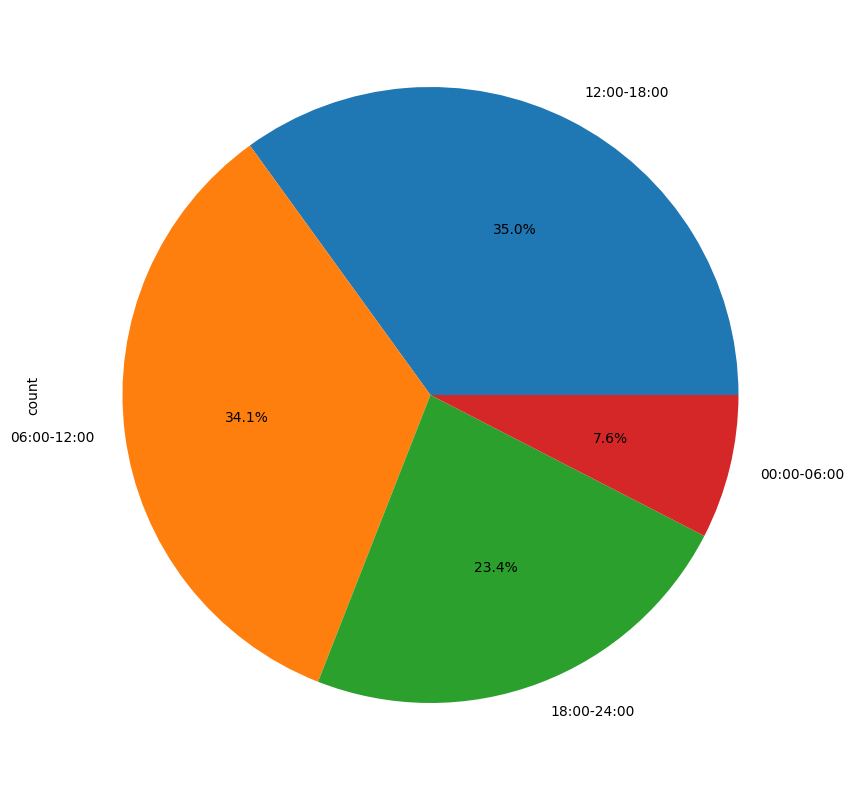

In [11]:
# flow fractions pie chart in time periods (00:00-06:00, 06:00-12:00, 12:00-18:00, 18:00-24:00)
flow_fraction_df = app_counts_df.copy(True)

flow_fraction_df["TIME_PERIOD"] = pd.cut(
    flow_fraction_df["TIME_FIRST"].dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=["00:00-06:00", "06:00-12:00", "12:00-18:00", "18:00-24:00"],
    right=False
)

time_period_counts = flow_fraction_df["TIME_PERIOD"].value_counts()

fig = plt.figure()
ax = fig.add_subplot()
time_period_counts.plot.pie(y='TIME_PERIOD', autopct='%1.1f%%', legend=None, ax=ax, figsize=(10, 10))

calculate median of [bytes, bytes_rev, packets, packets_rev, duration] for each app

In [12]:
app_median_df = app_counts_df.copy(True)

app_median_df = app_median_df[["APP_NAME", "BYTES", "BYTES_REV", "PACKETS", "PACKETS_REV", "DURATION"]].groupby(by="APP_NAME").median()

app_median_df

,BYTES,BYTES_REV,PACKETS,PACKETS_REV,DURATION
APP_NAME,,,,,
4chan,4964.0,6421.0,11.0,12.0,0.329940
adavoid,5772.0,12802.0,16.0,21.0,1.271623
alza-identity,3986.0,6985.0,13.0,13.0,0.255390
alza-webapi,1228.0,87.0,1.0,1.0,0.005849
alza-www,4805.0,5940.0,11.0,13.0,0.253505
...,...,...,...,...,...
unpkg,4764.5,8823.5,17.0,18.0,2.087030
vkontakte,3352.0,2509.0,7.0,6.0,0.065330
whatsapp,2927.0,3308.0,9.0,8.5,0.086926


# Feature Engineering

Bytes per packet

In [13]:
app_counts_df["BYTES_PER_PACKET"] = app_counts_df["BYTES"] / app_counts_df["PACKETS"]
app_counts_df["BYTES_PER_PACKET_REV"] = app_counts_df["BYTES_REV"] / app_counts_df["PACKETS_REV"]

Medians

In [14]:
app_counts_df[["APP_NAME", "BYTES_PER_PACKET", "BYTES_PER_PACKET_REV"]].groupby(by="APP_NAME").median()

,BYTES_PER_PACKET,BYTES_PER_PACKET_REV
APP_NAME,,
4chan,422.272736,641.900024
adavoid,317.970245,816.153870
alza-identity,309.875000,483.000000
alza-webapi,1228.000000,87.000000
alza-www,460.818176,495.750000
...,...,...
unpkg,272.323303,604.299194
vkontakte,478.714294,418.166656
whatsapp,418.875000,406.687500
